### <strong>[1주차 - Day4] 파이썬을 무기로, 코딩테스트 광탈을 면하자! (2)<strong>
* RGB색상표 참고: https://ingu627.github.io/md/markdown_grammar/

* ### Step 5-1:힙(Heap) 대표 문제 풀이: 더 맵게

* https://school.programmers.co.kr/courses/16609/lessons/166893

* #### 문제의 해결 - 예제

* 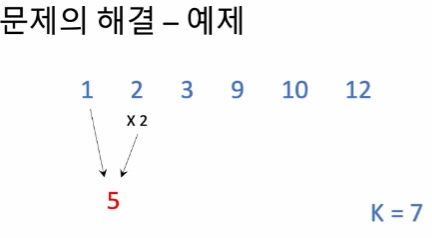

* 숫자 5는 왼쪽 부터 살펴 보며 자신의 들어갈 위치를 찾는다

* 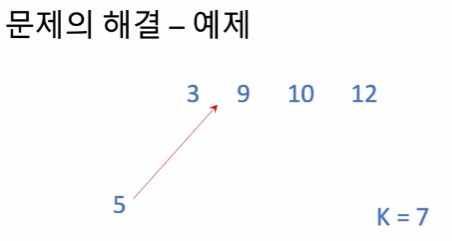

* 반복하여 K보다 작은 수 가 없다면 지금 까지 섞은 횟수를 리턴하면 된다!


* #### 알고리즘의 복잡도

* 최악의 경우:
    * 수가 하나 남을 때까지 섞어야 하는 경우(n-1)회  
    <br>
* 각 단계(섞는 일)에서 요구되는 계산량
    * 정렬된 리스트에 순서 맞추어 원소 삽입
    * O(n)  
    <br>
* 따라서 전체 알고리즘의 복잡도는 O(n*n)에 비례한다. => 지나치게 높다
* 뭔가 더 좋은 방법은 없을까? => 최소.최대 원소를 빠르게 꺼낼 수 있으면 좋겠다!  
<br>
=> 힙의 최대힙과 최소힙을 사용해보자!


* #### 힙(Heaps)

* 성질: 최대/최소 원소를 빠르게 찾을 수 있음
* 연산
    * 힙 구성(heapify) 힙 구성 경우 O(nlogn)의 복잡도를 가진다
    * 삽입 (insert) 삽입의 경우 O(logn)의 복잡도를 가진다
    * 삭제 (remove) 삭제의 경우 O(logn)의 복잡도를 가진다

* ### Step 5-2: Python 풀이 예제 보기

* #### Python 에서 힙 적용

* import heapq(힙(우선순위큐의 성질을 가짐)을 제공하는 라이브러리 임포트)
* heapq.heapify(L) 리스트 L로 부터 min heap 구성
* m = heapq.heappop(L) min heap L 에서 최소값 삭제(반환)
* heapq.heappush(L,x) min heap L에 원소 x삽입
* 삽입과 삭제후에도 heapq는 min heap의 성질을 유지한다

In [ ]:
import heapq

def solution(scovile, K):
    answer = 0
    heapq.heapify(scovile)
    # while문을 최대 n번 반복한다
    while True:
        # 이 pop 연산은 logn에 비례한다.
        minl = heapq.heappop(scovile)
        # 힙에서 제일 작은 값이 K보다 큰 경우 => 더이상 섞을 게 없어서 조건을 만족한 경우
        if minl >= K:
            break
        # 제일 작은 수 하나를 뺴냇더니 더 이상 아무것도 남아 있지 않은 경우
        # 이 pop 연산은 logn에 비례한다.
        elif len(scovile) == 0:
            answer = -1
            break
        min2 = heapq.heappop(scovile)
        new_scovile = minl + 2 * min2
        # 이 pop 연산은 logn에 비례한다.
        heapq.heappush(scovile, new_scovile)
        answer += 1
    return answer

    # 따라서 최종 알고리즘의 복잡도는 nlogn에 비례한다!

* 앞서 말한 것 처럼 이 알고리즘이 적어도 매 단계에서 리스트 안에 다시 섞어서 만들어진
* 스코빌 지수를 집어 넣을때 순서대로 정렬되 있는 배열에 순서대로 끼워 넣는거 보다는 
* 훨씬 나은 효율을 가지는 알고리즘이다!

* ### Step 6-1: 동적계획법(Dynamic Programming) 대표 문제 풀이: N으로 표현

* #### 동적 계획법
* 문제의 답 인지를 확인하기 위해서 탐색해야 하는 범위를 어떤 부분을 탐색할 것인지를 진전하면서 동적으로 결정
한다 라는 뜻이다

* 주어진 최적화 문제를(보통 최적화 문제를 다루는대 동적 프로그래밍이 이용됨) 재귀적인 방식으로 보다
작은 부분 문제로 나누어 부분 문제를 풀어, 이 해를 조합하여 전체 문제의 해답에 이르는 방식

* 알고리즘의 진행헤 따라 <span style="color:yellow">탐색해야 할 범위를 동적으로 결정</span>함으로써 탐색 범위를 한정할 수 있음

* 탐색범위가 클 때, 무작정 모든 경우를 다 고려하면 많은 범위를 탐색해야 하는대 이것을 처음에 부분 문제를 조금씩 풀어가면서 전부다가 아니라 그 상황에서 조금씩 조금씩 동적으로(유동적으로)결정하는 것을 말한다.

* #### 동적 계획법의 적용 예
* 피보나치 수열 -> 재귀함수로 구현한다면?
* 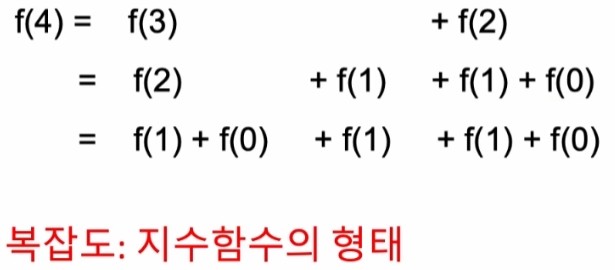

* 굉장히 함수를 여러번 호출하게 되므로 비 효율적으로 시간복잡도가 오래 걸리게 된다.

* 알고리즘의 복잡도는 지수함수의 형태이다!

* 피보나치 수열 -> 동적 계획법을 적용한다면?

* 점차적으로 부분적인 해를 구해서 저장하여 원래의 답에 도달하는 방식으로 프로그래밍한다면

* 복잡도는 선형함수의 형태로 나오게 된다.

* f(5)를 구하기위해서는 f(0), f(1)... 순서로 답을 구하고 그 답을 이용하여 f(5)까지 구하는 방식을 말한다

* 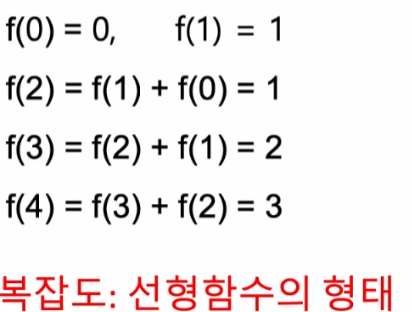

* 동적 계획법의 적당한 예제이므로 한번 구글링을 통해 이 문제를 보는 것을 추천

* 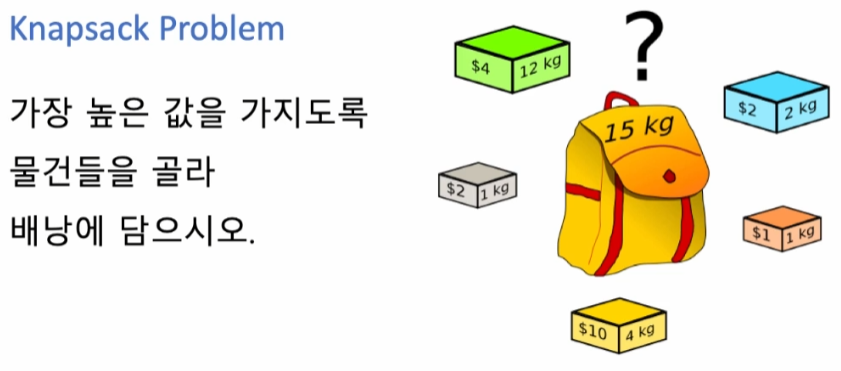

* https://school.programmers.co.kr/courses/16609/lessons/166896

* #### 문제의 해결 - 동적계획법으로 설계

* 1번 사용해서 만들 수 있는 수들을 가지고 2번 사용해서 만들 수 있는 수를 알 수있고 이 수들을 통해
3번 사용해서 만들 수 있는 수들을 알 수있다. 이렇게 부분적으로 풀어가며 우리가 원하는 숫자에 도달할때 까지 
해당 작업을 반복하여 최소 숫자의 개수를 리턴하도록 설계해야 한다!

* 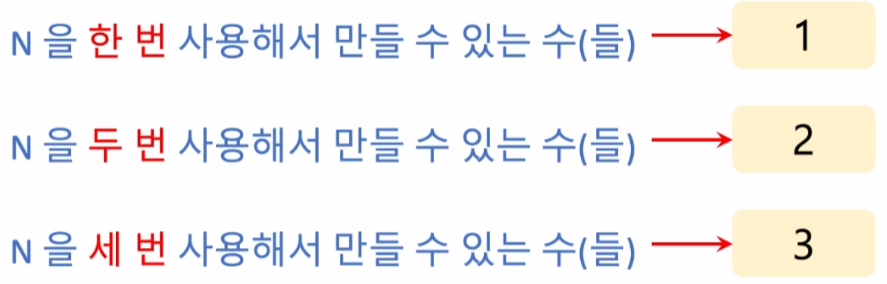

* #### 문제의 해결 - 예제

* n = 5 인경우 처음 1번은 5만 만들 수 있고 2번 사용해서는 55와 1번쨰로 만든 5을 사칙연산을 5와5를 지지고 볶은 수들을 만들 수 있다!

* 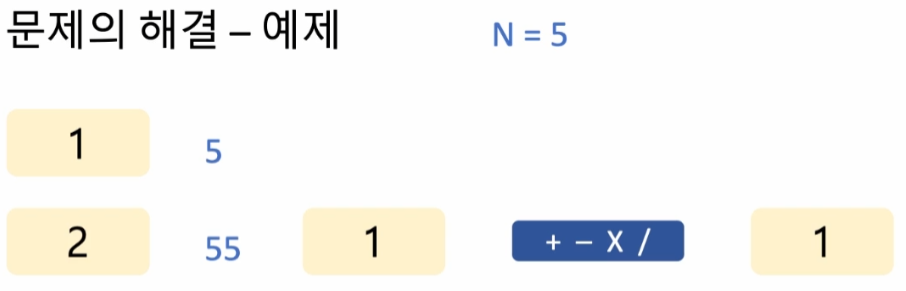

* 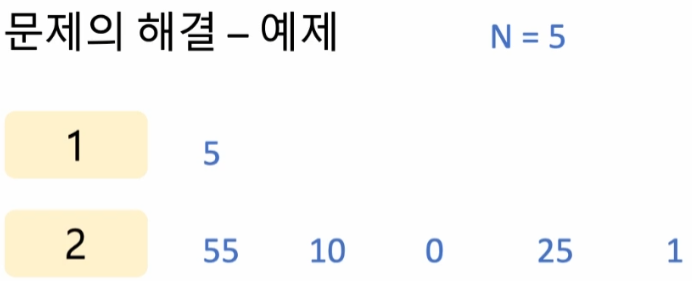

* 3번 사용해서는 555와 1번 사용해서 만든수와 2번 사용해서 만든수들(55,10,0,25,1)를 사칙연산한 수들을 만들 수있고 2번 사용해서 만든 수들과 1번 사용해서 만든 수들을 사칙연산한 수 들을 만들 수 있다( 덧셈과 곱셈은 교환법칙이 성립하기 때문에 사실 자리를 바꿔도 결과값은 동일하다)

* 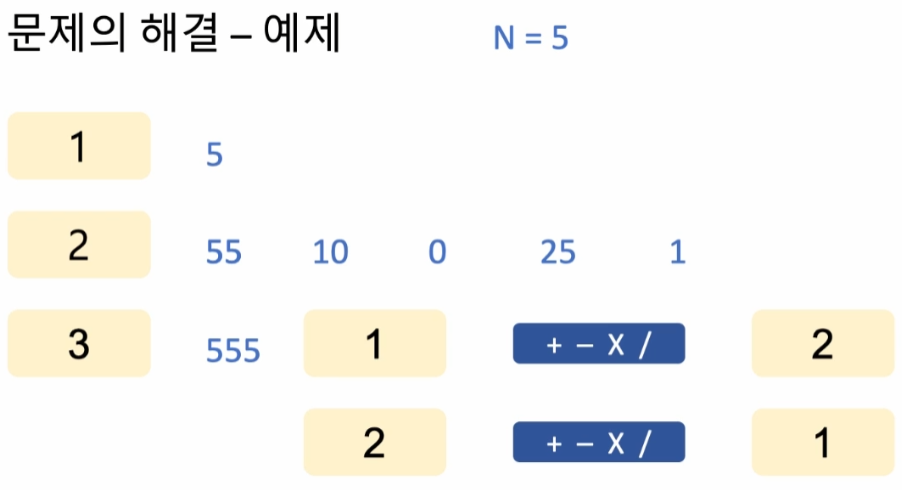

* 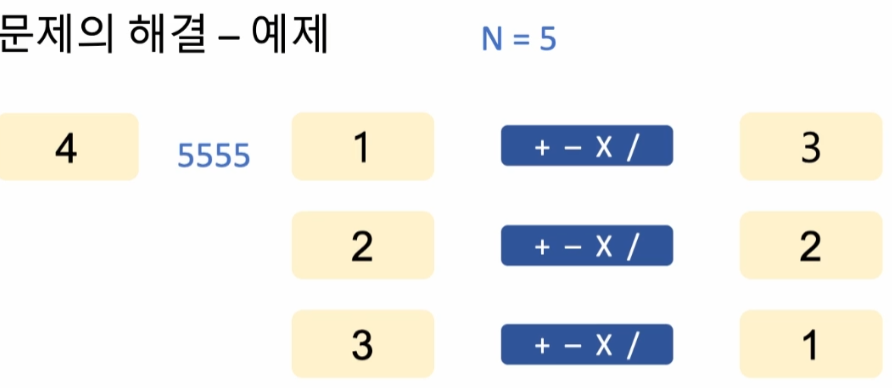

* 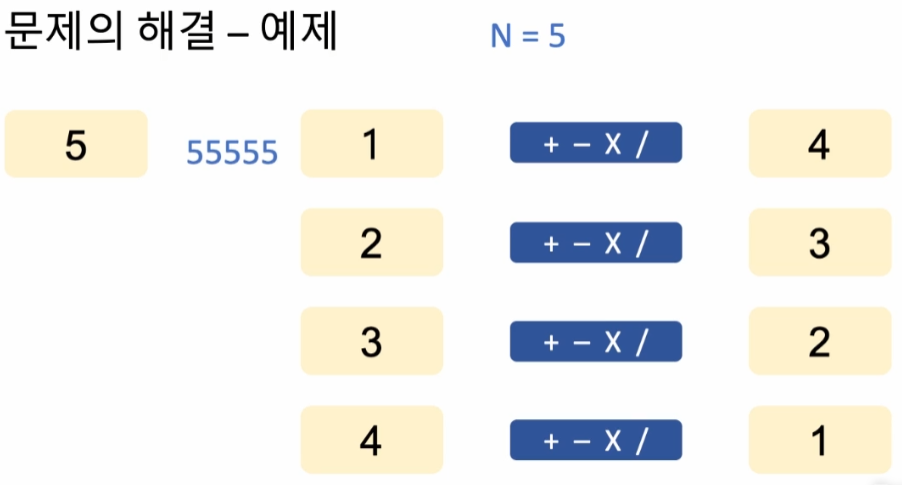

* 일반화 해보면

* 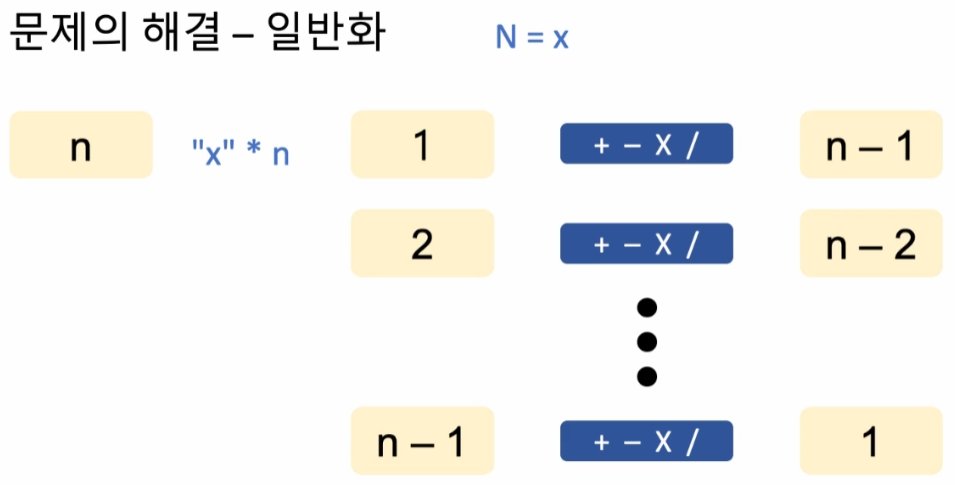

* 이렇게 일반화하게 되면 결국 ( )를 사용하여 우선순위에 맞게 사칙하는 연산의 케이스도 전부다 아우를 수 있게된다
* 따라서 우리가 추가적으로 ( )에 따라서 추가적인 경우는 고려하지 않아도 된다. 우리가 고려한 일반화한 케이스 안에 ()를 적용한 경우를 모두 포함 시킬 수 있다!

* 숫자가 늘어날 수록 발생할 수 있는 숫자의 경우를 센건대 최악의 경우라는 것은 사칙연산을 통해서 전부 
숫자들이 다를 경우 즉, 최악의 경우로 지지고 볶은 모든 숫자들이 서로 중복되지 않는 경우를 말한다.

* 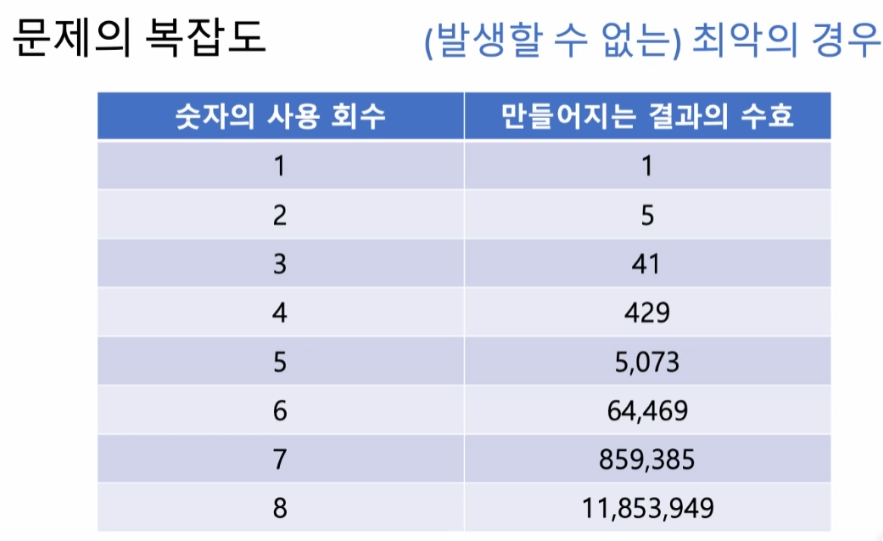

* 실제로 숫자를 넣어서 적용해 본경우 첫 열은 사용한 실제 숫자들을 말한다 행은 해당 행의 숫자를 사용한 횟수를 말한다

* 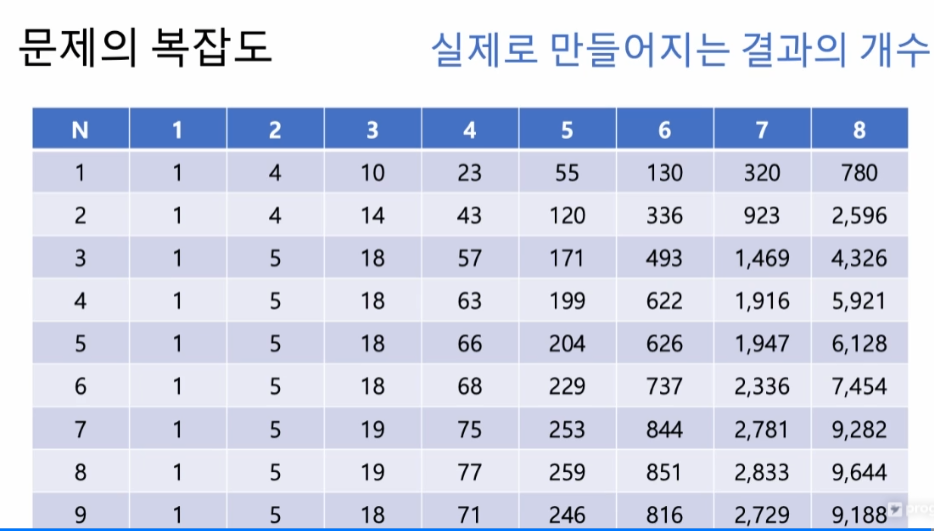

* 요약

* <span style = "color:Aqua">문제의 성질에 따라, 동적 계획법으로 풀어냄으로써 내가 탐색해야 하는 후보군의 범위를 효과적으로 줄일 수 있음</span>

* ### Step 6-2: Python 풀이 예제 보기

In [10]:
def solution(N, number):
    # 중복을 허용하지 않고 가능한 모든 수들을 모으고 싶은대 set을 사용해보자!
    # s에는 집합이 8개 들어있고 밑에 for문을 거치면 ex) 5인경우 s = [5,55,555,5555,55555,555555,5555555,55555555]
    # 수를 담고 있다!
    s = [set() for x in range(8)]
    for i, x in enumerate(s, start=1):
        x.add(int(str(N) * i))
    print(s)
    # 실제 여기 4중 for문을 보면 반복문이 많지만 결국 앞에서 만들어 놓은 i로 j를 찾아가고 j로 op1를 찾아가는 
    # 순차적인 구조로 이루어져 있어 생각보다 그렇게 시간이 오래 걸리지는 않는다
    for i in range(len(s)):
        for j in range(i):
            # 이 밑에 사칙연산을 위해 필요한 op1, op2는 사실 사칙연산을 위한 변수를 설정한 것으로 반복문으로써 보면 두 개의 for문 모두 한번씩만 실행한다!
            # 한번만 실행됨
            for op1 in s[j]:
                # 이것도 역시 한번 만 실행됨
                for op2 in s[i - j - 1]:
                    s[i].add(op1 + op2)
                    s[i].add(op1 - op2)
                    s[i].add(op1 * op2)
                    # 나머지는 버리라고 했으니 // 사용 그리고 주의할 점이 뒤에 오는것이 0 이면 나눗셈을 할 수없으므로
                    if op2 != 0:
                        s[i].add(op1 // op2)
        if number in s[i]:
            answer = i + 1
            print(s)
            break
    # i가 8번 다 했는대 break문을 거치지 않고 빠져 나온다는 애기는 8번사용해서는 만들 수가 없었다는 애기!
    # 이런 경우는 -1을 리턴하도록함(문제 조건)
    else:
        answer = -1

    return answer
                    


* 내가 개념정리한 파일을 첨부함. 이해하는대 도움 됨

* <img src="./20230316_114849.jpg">

In [12]:
solution(2,11)

[{2}, {22}, {222}, {2222}, {22222}, {222222}, {2222222}, {22222222}]
[{2}, {0, 1, 4, 22}, {0, 1, 2, 3, 6, 8, 11, -20, 44, 20, -2, -1, 24, 222}, {2222}, {22222}, {222222}, {2222222}, {22222222}]


3

* ### Step 7-1: 깊이/너비 우선 탐색(DFS/BFS) 대표 문제 풀이: 여행경로

* #### 배경지식

* 그래프
    * 정점과(node) 간선(edge, link)
    * 유향(directed) 그래프와 무향(undirected) 그래프: 간선에 방향이 있는 그래프와 없는 그래프  
    <br>
* 스택 (stack)
* 큐 (queue)

* #### 깊이 우선 탐색(DFS: Depth-First Search)

* 한 정점에서 인접한 모든(아직 방문하지 않은) 정점을 방문하되, 각 인접 정점을 기준으로 깊이 우선 탐색을
끝낸 후 다음 정점으로 진행

* 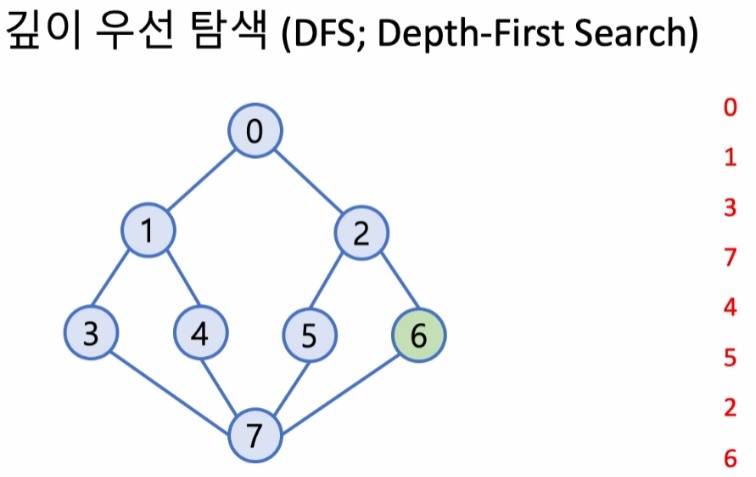

* 방문하는 이용새를 보면 스택을 이용해서 어느 정점에서 DFS를 하고 있는지를 기억하고 되돌아감

* #### 너비 우선 탐색(BFS: Breadth-First Search)

* 한 정점에서 인접한 모든(아직 방문하지 않은) 정점을 방문하고, 방문한 각 인접 정점을 기준으로
(방문한 순서에 따라) 또 다시 너비 우선 탐색을 행함

* 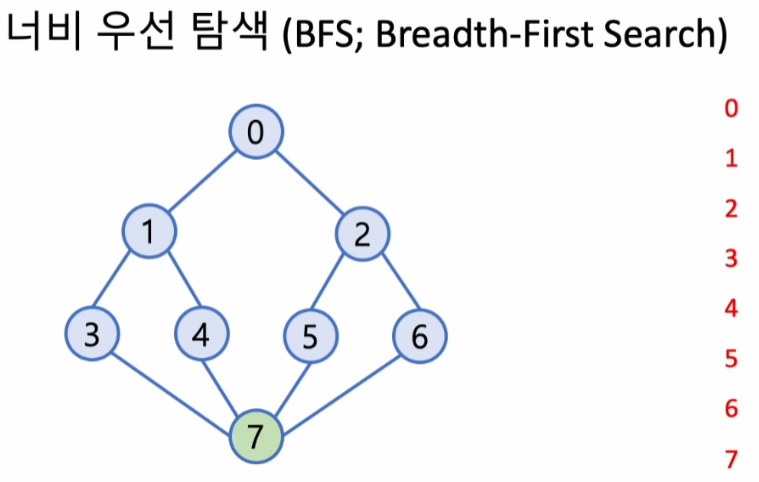

* 큐를 이용하여 어느 정점에서 BFS를 해야 하는지를 기록하고 진행함

https://school.programmers.co.kr/courses/16609/lessons/166899

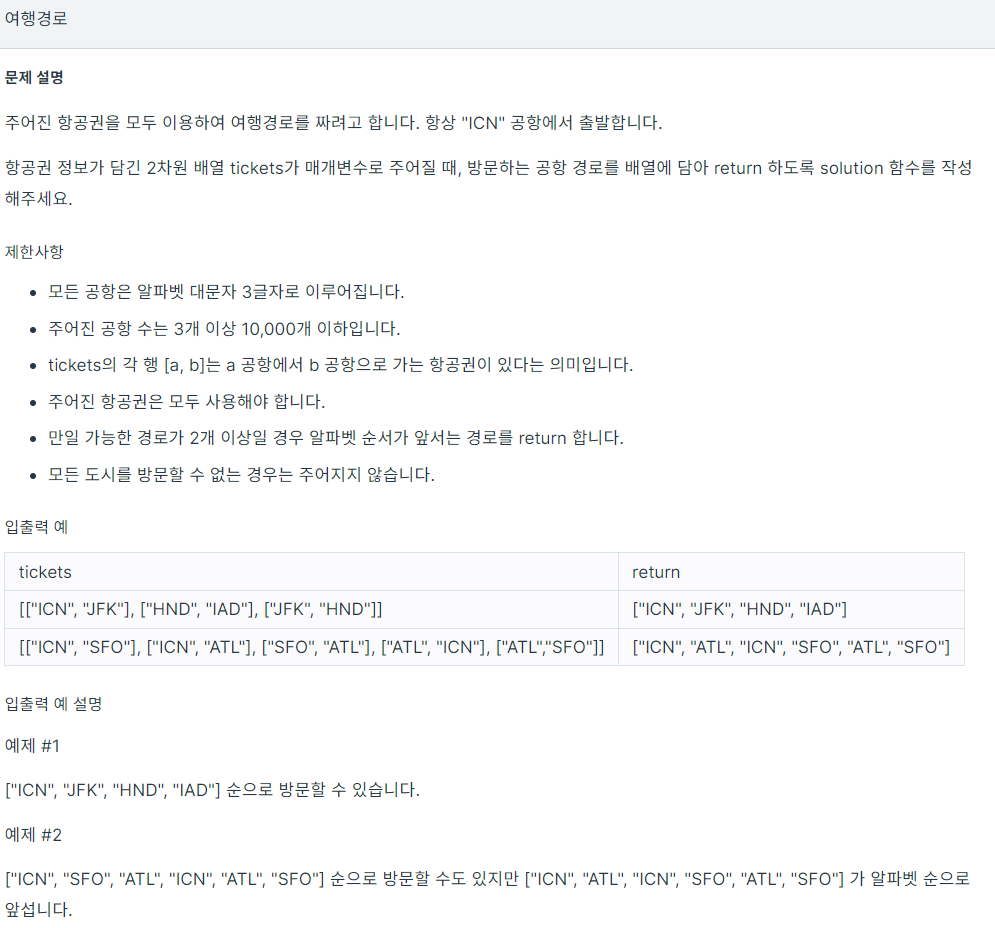

* #### 예제 풀이

* 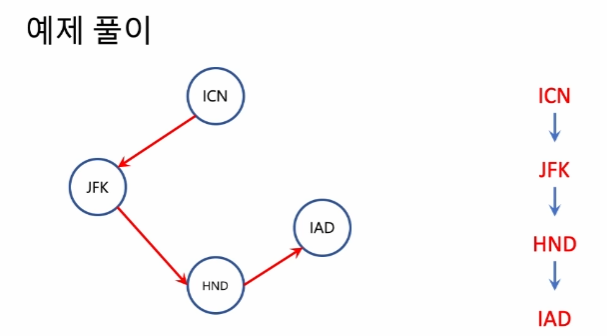

* 살펴보면 한 붓그리기와 그 성질이 비슷하다 하지만 이 방법이 유일한 방법은 아니다!

* 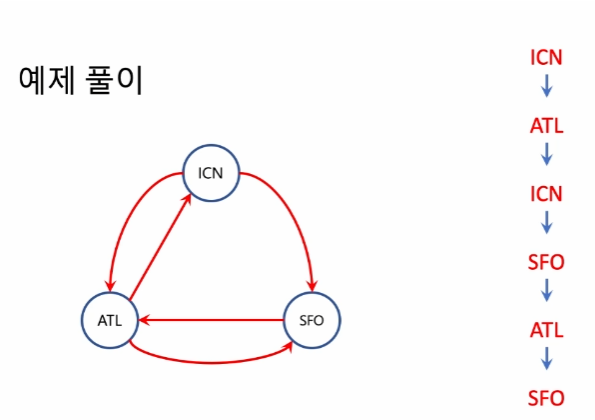

* 이것도 유효한 한 붓그리기가 된다 하지만 알바벳 순서로 보면 S보다 I가 빠르므로 첫번쨰 구한 경로를 택하라는 것이다.

* 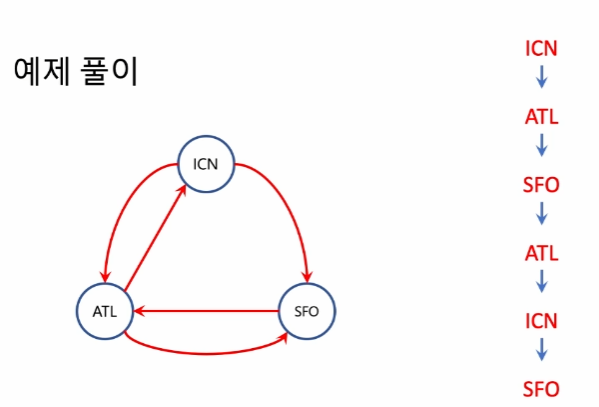

* 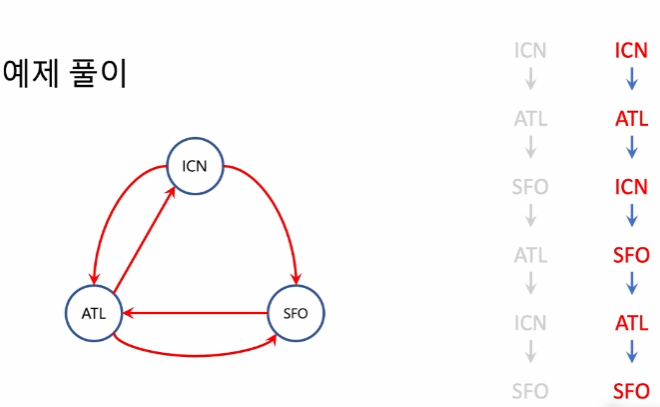


* #### 문제의 해결 - 깊이 우선 탐색(DFS)을 응용

    * 한 붓 그리기!
        * 이것이 가능함을 문제에서 보장되어 있음 -> 모든 항공권을 소진(모든 간선을 지나가라)하면서 모든 도시들을 방문 할 수있도록
        문제가 주어지므로 가능하다!  
        <br>
    
    * 시작 정점은 언제나 "ICN"
    * 모든 정점 방문이 아니고, 모든 간선을 거쳐야 한다.
        * 언젠가는 한 번 가야 하는대, 그 순서를 결정하라.
    * 한 정점에서 택할 수 있는 간선이 두 개 이상인 경우?
        * 공항 이름의 알바벳 순서를 따른다.

* #### 알고리즘의 설계

* 인천공항에서 출발하여 인천공항에서 갈 수있는곳은 ATL과 SFO가 있다 여기서 알파벳순서인 ATL을 방문한다

* 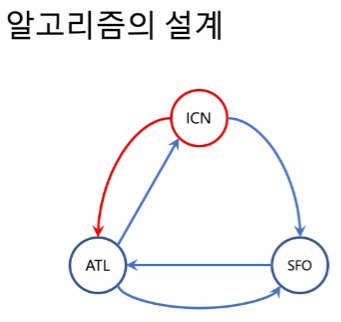

* 이제 이 항공권은 사용했으니 없다고 치고 ATL에서 시작해서 알파벳 순서로 가장 빠르게 갈 수있는 한 붓그리기를
하라는 말과 비슷하다! => 재귀적인 문제의 형태를 띤다!

* 밑에서는 갈 곳은 2군대지만 알파벳 순서에 의해 인천을 방문한다

* 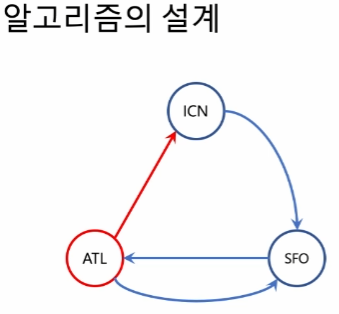

* 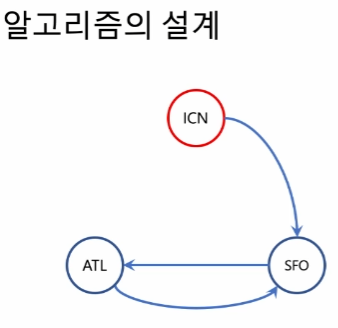

* <span style="color:yellow">스택을 이용하여 재귀적인 "한 붓 그리기" 문제를 해결 -> DFS 알고리즘의 응용</span>


* #### 알고리즘의 동작

* 스택을 이용한다 방문하는 공항을 스택에 집어 넣는다 왜냐면 어디를 갔다가 내가 어디까지 갔더라
* 돌아와서 다음에 갈 곳을 정해야 하므로 최근에 간 곳을 계속 확인하며 이동해야 한다! 
* 최근에 넣은 데이터를 꺼낼수 있는 자료형(fifo)은 스택이므로 스택을 사용하는 것이다!

* 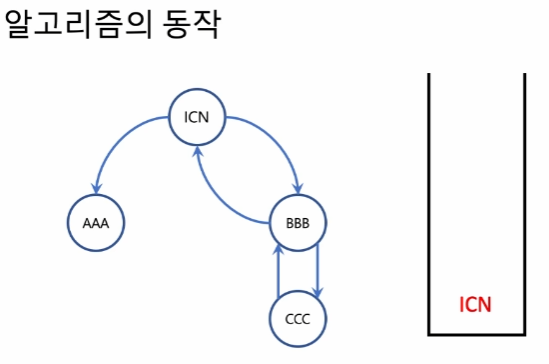

* 알파벳 순서를 우선하여 AAA로 이동 그리고 방문했으므로 스택에 집어 넣음

* 그리고 AAA는 더이상 갈 곳이 없음 없는 경우는

* 여기서 출발하는 표(간선)이 없거나 아니면 있는대 여기에 있는 간선(표)를 다 쓴것이다. 이런경우 원래 공항인
* ICN공항(스택에서 못가는 곳을 빼고 가장 최근장소)에 와서 다시 한 붓그리기를 행해야 한다 이때 AAA를 스택에서 빼내서 어딘가에 저장해놓고 ICN에서 BBB를 택하고 BBB는 스택에 저장하고 

* 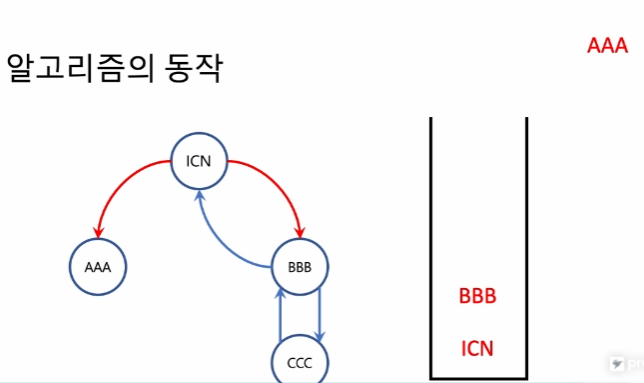

* BBB에서는 ICN과 CCC를 갈 수있지만 알파벳 순서를 우선하여 CCC로 이동한다 CCC에서는 BBB공항으로 이동가능

* 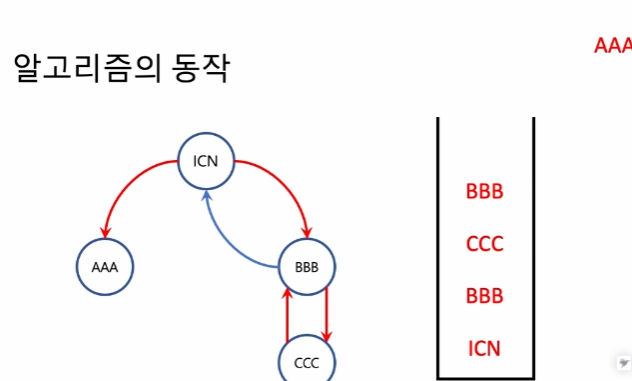

* BBB에서 ICN으로 돌아왔더니 더 이상 갈 수있는 곳이 없다 이제 스택에서 꺼낸다

* 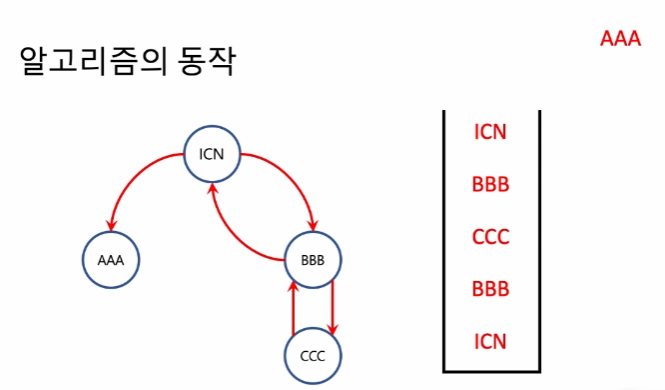

* 한 붓그리기를 실패할 수있는 경우가 존재할까? 그런 경우는 없다! 문제에서 그런 경우는 주지 않겠다고 했음
* 결과적으로 인천공항이 됫든 다른공항이 됫든 마지막 공항에서 표가 남아 있지 않게 되면 그 때까지는 한 붓그리기가 성공한 것이다

* 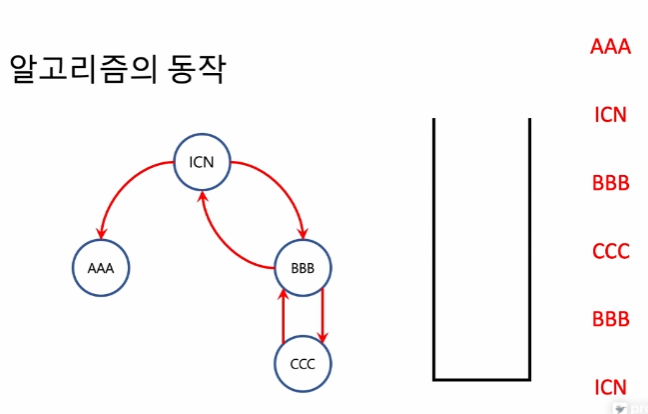

* 스택에서 꺼낸것의 역순으로 보자면 문제의 답이 된다(? 잘 모르겠음)

* 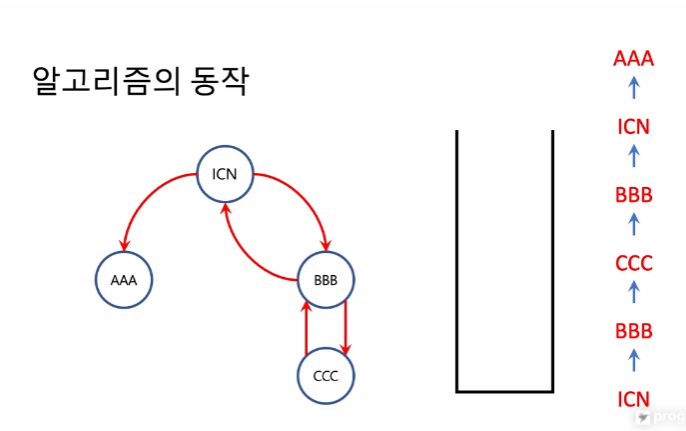

In [ ]:
[["ICN", "AAA"], ["ICN", "BBB"], ["BBB", "CCC"], ["CCC", "BBB"], ["BBB","ICN"]]

* #### 요약

* 재귀적인 성질을 가진 한 붓 그리기 문제

* -> 재귀적인 성질을 가진 그래프의 깊이 우선 탐색을 응용하여 해결

* ### Step 7-2: Python 풀이 예제 보기

* 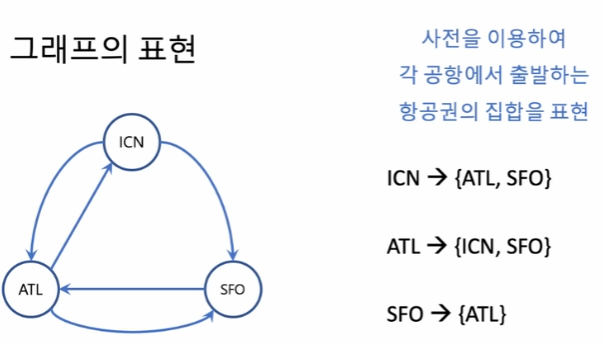

* 우리는 알바펫 순서를 고려해야 하므로 리스트로 생각하면 유리할 거같다

* 원소를 뒤에서 부터 제거하는게 앞에서 부터 제거 하는거 보다 더 효율적이다(왜 그런지는 잘 모르겠음)
-> 따라서 알파벳의 역순으로 정렬하자!

* 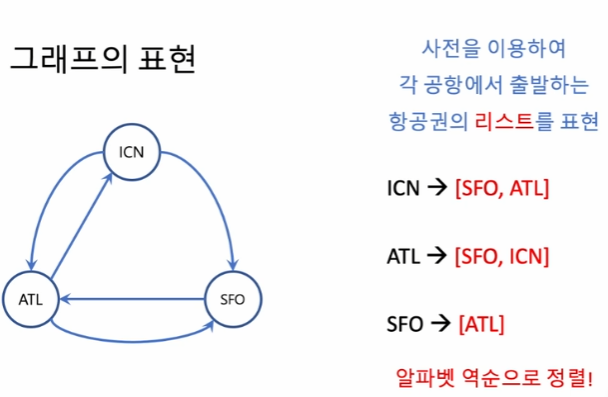

In [26]:
def solution(tickets):
    routes = {}
    # 출발공항이 key가 되고 value는 공항에서부터 출발해서 갈 수있는 다른 공항들의 이름이 들어있음
    # .get 메서드는 인자로 키값을 넣으면 value값을 반환한다 만약 없다면 None을 반환한다. 
    # 만약 해당 key가 없을때 반환되는
    # 값을 바꾸고 싶다면 get()메서드의 두번째 인자로 주면 된다!
    # 아래 함수는 처음에 딕셔너리를 만들때 없는 경우 t[1]을 넣고 그 다음부터는 기존에 있는 value값을 
    # 변화시키지 않으면서 값을 추가하여 채워넣으려고 .get(인자로 []를 넣어서 ) 함수를 이렇게 만든거 같다.
    for t in tickets:
        routes[t[0]] = routes.get(t[0], []) + [t[1]]
        # print(routes)
    # 이 정렬에 의해 알고리즘의 복잡도는 nlogn에 비례한다
    for r in routes:
        routes[r].sort(reverse = True)
    print(routes,"이제 탐색 시작합니다")
    stack = ["ICN"]
    path = []
    # 여기서 부터 이루어지는 알고리즘의 복잡도는 상수시간이다! 이미 정렬되었으므로 맨뒤값만 꺼내 쓰는것이므로
    # 상수시간이 걸린다! 따라서 이 알고리즘의 총 시간 복잡도는 nlogn이다!
    while len(stack) > 0:
        # top은 스택의 맨 위에 있는 원소
        top = stack[-1]
        # 어떤 공항에서 출발하는 표가 한 장도 없다면(그 공항은 value에만 있을것이고 key에는 해당 공항의 이름은 없을 것이다 => not in routes와 동일한말 이 말은 key만 보는 것 이므로!) or 있었는대 다써서 이제는 없게 되면
        if top not in routes or len(routes[top]) == 0:
            path.append(stack.pop())
            print("경로:",path)
        else:
            # routes[top][-1] => 알바벳 역순으로 정렬했기 때문에 이게 가장 알파벳순으로 먼저 있는 공항이다
            stack.append(routes[top][-1])
            print("스택:", stack)
            # 마지막 원소를 없앤다
            routes[top] = routes[top][:-1]
            print(routes)
    # 이렇게 슬라이스 문법을 적용하면 역순으로 나오게 할 수있다.
    return path[::-1]



* path에 넣는건 더이상 키에 매핑된 밸류가 하나라도 없을때 넣는다. 모두 순회해서 원래 밸류가 다 없어졌거나 top의 값이 밸류의 값만 존재할때 !
* top을 게속 해서 사용하는 이유는 최근에 방문한 값을 기억하고 알파벳 순서로 정렬된 순서에 맞게 돌아다녀야 하므로 stack[-1]를 사용한다!
* 스택에는 방문한 히스토리를 저장하는 용도이다. 스택에서 뺴낼때는 이제 해당 경로는 효용가치가 다 떨어져(다 방문했거나 밸류값이라서 더이상 여기서 못 움직일때)이제 경로를 기록하기 위해 넣는다
* 효용가치가 제일 먼저 떨어지는 것들 제일 마지막에 방문하는것으로 코딩이 되어있다. ex) aaa를 제일 마지막에 방문함. => 아마도 aaa는 제일 먼저 못움직이므로 제일 먼저 가치가 떨어져 잘못하면 aaa갔다가
* 막혀 다른 노드를 순회하지 못 할 수도 있어서 aaa를 마지막에 방문하는 것으로 코딩이 되어있는거 같다.
* 해당 코딩은 내가 위에서 캡처한 방법을 고대로 코드로 옮겨놓은 것이기에 해당 사진을 참고하면 도움이 많이 될 거같다.

* * <img src="./여행경로.jpg">

In [ ]:
dict = {'aaa':40,'bbb':33,'ccc':78}
for i in dict:
    # 이렇게 하게되면 반복문에는 key만 나오게 된다!
    print(i)
dict2 = {}
# 이렇게 적어주는 것만 하더라고 딕셔너리에 키 값을 부여하는 것이다!
# 이 사실을 알아야 할 듯하다
dict2['aaa'] = []
print(dict2)

aaa
bbb
ccc
{'aaa': []}


In [27]:
solution([["ICN", "AAA"], ["ICN", "BBB"], ["BBB", "CCC"], ["CCC", "BBB"], ["BBB","ICN"]])

{'ICN': ['BBB', 'AAA'], 'BBB': ['ICN', 'CCC'], 'CCC': ['BBB']} 이제 탐색 시작합니다
스택: ['ICN', 'AAA']
{'ICN': ['BBB'], 'BBB': ['ICN', 'CCC'], 'CCC': ['BBB']}
경로: ['AAA']
스택: ['ICN', 'BBB']
{'ICN': [], 'BBB': ['ICN', 'CCC'], 'CCC': ['BBB']}
스택: ['ICN', 'BBB', 'CCC']
{'ICN': [], 'BBB': ['ICN'], 'CCC': ['BBB']}
스택: ['ICN', 'BBB', 'CCC', 'BBB']
{'ICN': [], 'BBB': ['ICN'], 'CCC': []}
스택: ['ICN', 'BBB', 'CCC', 'BBB', 'ICN']
{'ICN': [], 'BBB': [], 'CCC': []}
경로: ['AAA', 'ICN']
경로: ['AAA', 'ICN', 'BBB']
경로: ['AAA', 'ICN', 'BBB', 'CCC']
경로: ['AAA', 'ICN', 'BBB', 'CCC', 'BBB']
경로: ['AAA', 'ICN', 'BBB', 'CCC', 'BBB', 'ICN']


['ICN', 'BBB', 'CCC', 'BBB', 'ICN', 'AAA']

In [18]:
# 이 경우는 모든 도시를 방문할 수없는 경우이다! 이런 경우는 주어지지 않는다고 문제 조건에 나와있다! ["ICN","KKK"]이 경우는 불가능함!
solution([["ICN", "AAA"], ["ICN", "BBB"], ["BBB", "CCC"], ["CCC", "BBB"], ["BBB","ICN"], ["ICN","KKK"]])

{'ICN': ['KKK', 'BBB', 'AAA'], 'BBB': ['ICN', 'CCC'], 'CCC': ['BBB']} 이제 탐색 시작합니다
{'ICN': ['KKK', 'BBB'], 'BBB': ['ICN', 'CCC'], 'CCC': ['BBB']}
{'ICN': ['KKK'], 'BBB': ['ICN', 'CCC'], 'CCC': ['BBB']}
{'ICN': ['KKK'], 'BBB': ['ICN'], 'CCC': ['BBB']}
{'ICN': ['KKK'], 'BBB': ['ICN'], 'CCC': []}
{'ICN': ['KKK'], 'BBB': [], 'CCC': []}
{'ICN': [], 'BBB': [], 'CCC': []}


['ICN', 'BBB', 'CCC', 'BBB', 'ICN', 'KKK', 'AAA']